In [11]:
import psycopg2
import psycopg2.extras
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy
from scipy.stats import ks_2samp
from scipy import stats
import statsmodels.api as sm
#set options for displaying all the columns and rows
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)


In [2]:
df = pd.read_csv('/Users/anastasiyaayala/Desktop/bootcamps_edu/data/combined_skills.csv')

In [7]:
#remove ',' from program cost and salary 
df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

In [15]:
#replace 'self-paced' option for 280 day, we did research online, students have access to resources for up to 40 weeks
df['course_length'] = df['course_length'].apply(lambda x: x.replace('Self-paced','280') if isinstance(x, str) else x)

In [17]:
df.columns

Index(['school_name', 'campus_location', 'program_name', 'program_cost',
       'java', 'csharp_net', 'html', 'css', 'javascript', 'es6', 'jquery',
       'nodejs', 'reactjs', 'redux', 'heroku', 'sql', 'mysql', 'postgress',
       'mongodb', 'firebase', 'git', 'spring', 'api', 'applied_stats',
       'python', 'r', 'regression', 'classification', 'clustering',
       'time_series_analysis', 'anomaly_detection', 'language_processing',
       'machine_learning', 'advanced_topics', 'story_telling_with_data',
       'domain_expertise_development', 'reporting_start', 'reporting_end',
       'course_length', 'graduates_included', 'graduated_ontime',
       'intend_infield_employment', 'employed_infield_90days',
       'employed_infield_180days', 'not_seeking_infield_90days',
       'not_seeking_infield_180days', 'still_seeking_infield_90days',
       'still_seeking_infield_180days', 'median_annual_salary90days',
       'median_annual_salary180days', 'under70K_90days', 'under70K_180days',
   

In [18]:
#columns that need to be converted to floats
cols_tofloat = ['program_cost','median_annual_salary90days','median_annual_salary180days','course_length']

In [21]:
df[cols_tofloat] = df[cols_tofloat].astype(float)

In [26]:
#-1 used to be placeholder for NaN, replaced it back with NaN
df = df.replace({-1:np.nan})

### Exploratory Data Analysis

In [23]:
sns.set()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   school_name                    67 non-null     object 
 1   campus_location                67 non-null     object 
 2   program_name                   67 non-null     object 
 3   program_cost                   67 non-null     float64
 4   java                           61 non-null     float64
 5   csharp_net                     61 non-null     float64
 6   html                           61 non-null     float64
 7   css                            61 non-null     float64
 8   javascript                     61 non-null     float64
 9   es6                            61 non-null     float64
 10  jquery                         61 non-null     float64
 11  nodejs                         61 non-null     float64
 12  reactjs                        61 non-null     float

In [29]:
df.describe()

,program_cost,java,csharp_net,html,css,javascript,es6,jquery,nodejs,reactjs,redux,heroku,sql,mysql,postgress,mongodb,firebase,git,spring,api,applied_stats,python,r,regression,classification,clustering,time_series_analysis,anomaly_detection,language_processing,machine_learning,advanced_topics,story_telling_with_data,domain_expertise_development,course_length,graduates_included,graduated_ontime,intend_infield_employment,employed_infield_90days,employed_infield_180days,not_seeking_infield_90days,not_seeking_infield_180days,still_seeking_infield_90days,still_seeking_infield_180days,median_annual_salary90days,median_annual_salary180days,under70K_90days,under70K_180days,salary_70K_80K_90days,salary_70K_80K_180days,salary_80K_90K_90days,salary_80K_90K_180days,over90K_90days,over90K_180days
count,67.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,60.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,16859.925373,0.459016,0.426230,0.770492,0.770492,0.770492,0.114754,0.163934,0.163934,0.278689,0.114754,0.032787,0.688525,0.131148,0.229508,0.114754,0.032787,0.327869,0.133333,0.081967,0.081967,0.278689,0.016393,0.081967,0.081967,0.081967,0.081967,0.081967,0.081967,0.081967,0.081967,0.098361,0.081967,161.552239,50.208955,85.122388,96.774627,60.925373,79.619403,2.126866,2.397015,33.732836,14.768657,68954.388060,71595.492537,52.870149,54.335821,13.307463,12.598507,10.559701,10.805970,23.050746,21.749254
std,5787.568148,0.502453,0.498632,0.424006,0.424006,0.424006,0.321370,0.373288,0.373288,0.452075,0.321370,0.179556,0.466940,0.340363,0.424006,0.321370,0.179556,0.473333,0.342803,0.276591,0.276591,0.452075,0.128037,0.276591,0.276591,0.276591,0.276591,0.276591,0.276591,0.276591,0.276591,0.300273,0.276591,74.766563,35.037010,12.652701,5.448529,14.025089,11.349666,4.576905,4.834659,14.172502,9.438384,29469.515454,23598.960114,33.760036,33.282513,14.067977,13.520114,11.816463,11.282554,32.429034,31.676362
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000,3.000000,48.100000,71.700000,26.900000,42.800000,0.000000,0.000000,6.800000,0.000000,0.000000,37440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15500.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,21.000000,80.950000,94.950000,51.350000,74.250000,0.000000,0.000000,23.950000,7.100000,59500.000000,57060.000000,26.350000,27.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16500.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,42.000000,89.300000,100.000000,61.000000,81.500000,0.000000,0.000000,33.300000,15.400000,65000.000000,65000.000000,54.500000,59.000000,10.000000,9.700000,7.300000,7.100000,5.600000,7.500000
75%,22500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,

In [32]:
df.columns

Index(['school_name', 'campus_location', 'program_name', 'program_cost',
       'java', 'csharp_net', 'html', 'css', 'javascript', 'es6', 'jquery',
       'nodejs', 'reactjs', 'redux', 'heroku', 'sql', 'mysql', 'postgress',
       'mongodb', 'firebase', 'git', 'spring', 'api', 'applied_stats',
       'python', 'r', 'regression', 'classification', 'clustering',
       'time_series_analysis', 'anomaly_detection', 'language_processing',
       'machine_learning', 'advanced_topics', 'story_telling_with_data',
       'domain_expertise_development', 'reporting_start', 'reporting_end',
       'course_length', 'graduates_included', 'graduated_ontime',
       'intend_infield_employment', 'employed_infield_90days',
       'employed_infield_180days', 'not_seeking_infield_90days',
       'not_seeking_infield_180days', 'still_seeking_infield_90days',
       'still_seeking_infield_180days', 'median_annual_salary90days',
       'median_annual_salary180days', 'under70K_90days', 'under70K_180days',
   

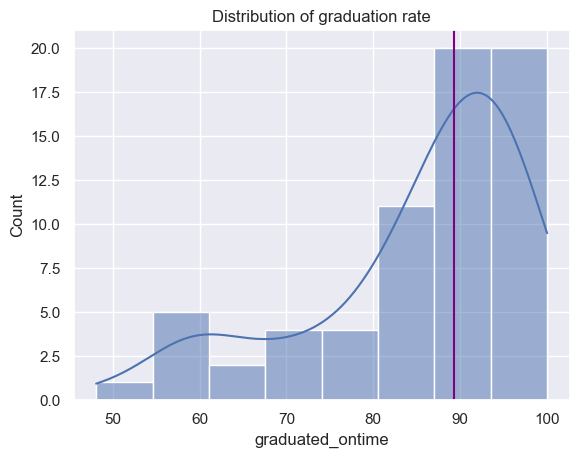

In [33]:
#distribution of graduation rate
xmedian = np.median(df['graduated_ontime'])
sns.histplot(data = df, x = 'graduated_ontime', kde=True)
plt.axvline(xmedian, c = "purple")
plt.title("Distribution of graduation rate");

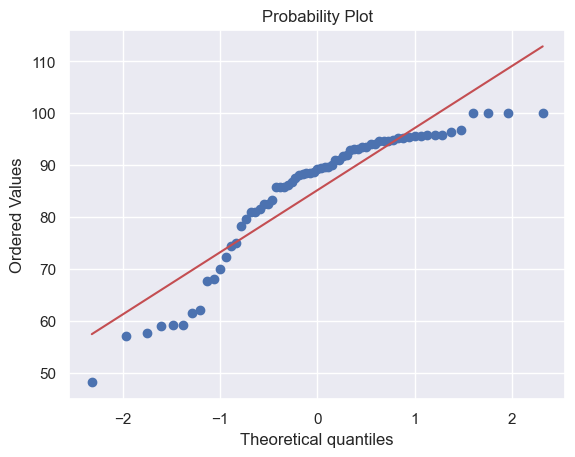

In [35]:
scipy.stats.probplot(df['graduated_ontime'].dropna(),dist='norm',plot=sns.mpl.pyplot);

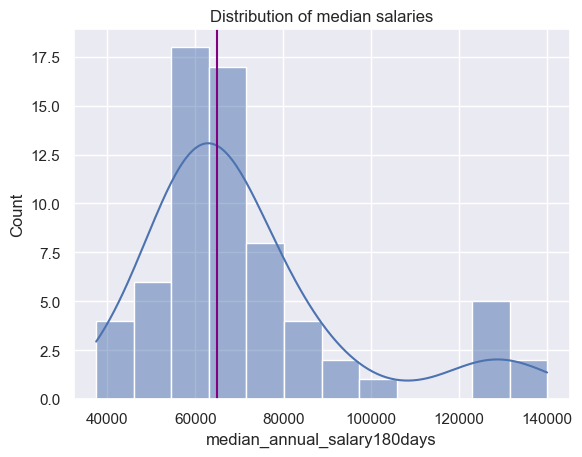

In [37]:
#distribution of median salary 180 days after graduation
xmedian = np.median(df['median_annual_salary180days'])
sns.histplot(data = df, x = 'median_annual_salary180days',kde=True)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of median salaries");

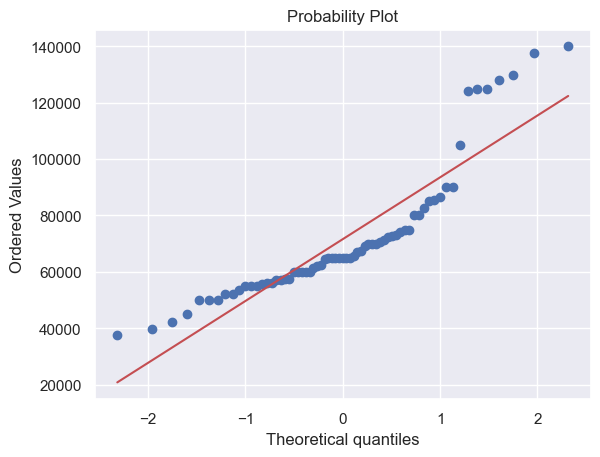

In [38]:
scipy.stats.probplot(df['median_annual_salary180days'].dropna(),dist='norm',plot=sns.mpl.pyplot);

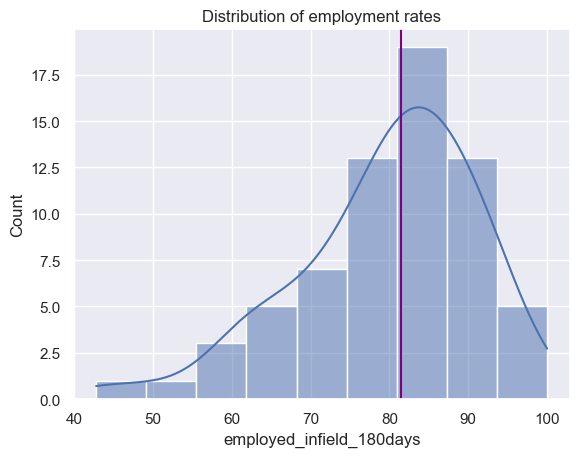

In [39]:
#distribution of employmet rate 180 days after graduation
xmedian = np.median(df['employed_infield_180days'])
sns.histplot(data = df, x = 'employed_infield_180days',kde=True)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of employment rates");

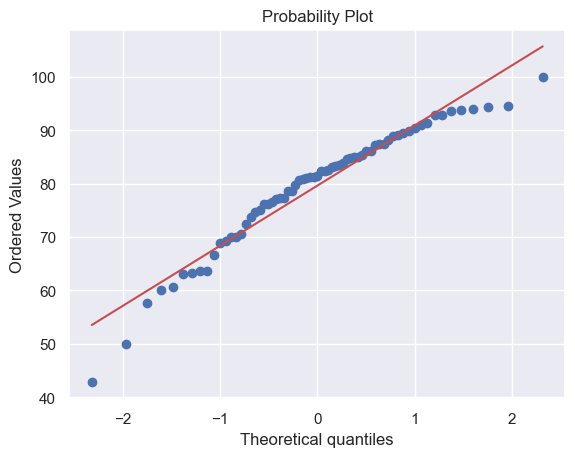

In [40]:
scipy.stats.probplot(df['employed_infield_180days'].dropna(),dist='norm',plot=sns.mpl.pyplot);

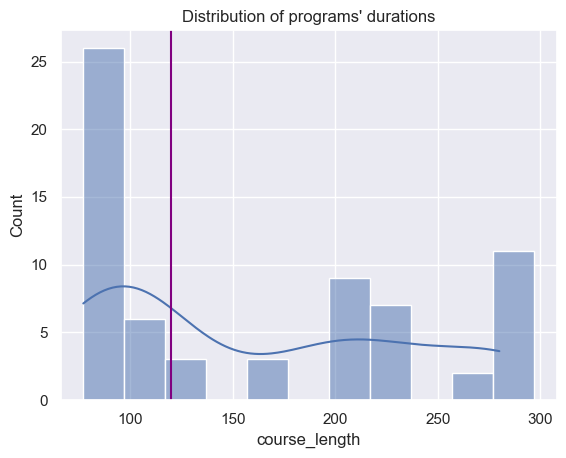

In [47]:
#distribution of employmet rate 180 days after graduation
xmedian = np.median(df['course_length'])
sns.histplot(data = df, x = 'course_length',kde=True, binwidth=20)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of programs' durations");

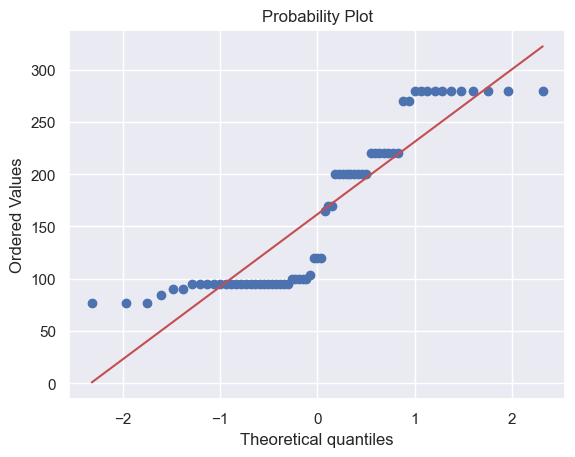

In [48]:
scipy.stats.probplot(df['course_length'].dropna(),dist='norm',plot=sns.mpl.pyplot);

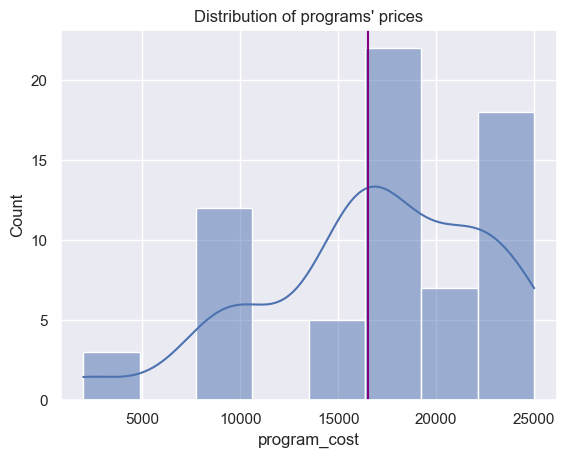

In [55]:
#distribution of employmet rate 180 days after graduation
xmedian = np.median(df['program_cost'])
sns.histplot(data = df, x = 'program_cost',kde=True, bins=8)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of programs' prices");

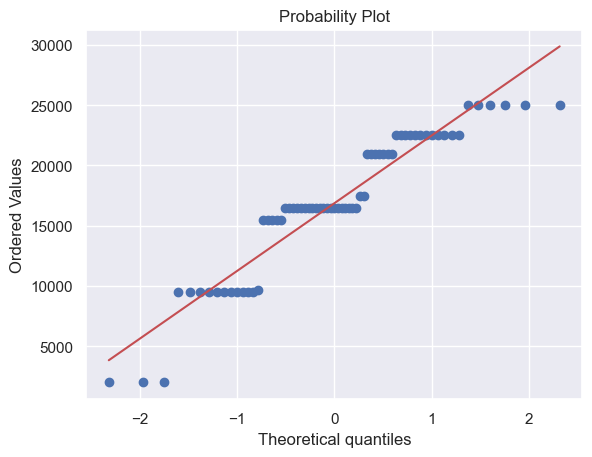

In [56]:
scipy.stats.probplot(df['program_cost'].dropna(),dist='norm',plot=sns.mpl.pyplot);

### KS test

#### The null hypothesis: There are no significant difference between median salaries distributions for remote and onsite positions

In [42]:
# Subset data by program location
remote = ['Online','Remote']
onsite = ['Boston', 'Chicago', 'Cincinnati', 'Cleveland', 'Columbus', 'Dallas', 'Los Angeles', 'New York', 'Philadelphia', 
         'Pittsburgh', 'Salt Lake City', 'San Antonio','San Antonio - Vogue', 'Tokyo', 'Toronto', 'Wilmington']
location1 = df[df['campus_location'].isin(remote)]['median_annual_salary180days']
location2 = df[df['campus_location'].isin(onsite)]['median_annual_salary180days']

# Perform KS test
statistic, p_value = ks_2samp(location1, location2)


print("KS test statistic:", statistic)
print("p-value:", p_value)

KS test statistic: 0.29554263565891475
p-value: 0.10495022255796234


#### H0: There are no significant difference between median salaries distributions for remote and onsite positions
#### The p-value (0.10495022255796234) > 0.05, we fail to reject the null hypothesis.
#### There is no signicant influence of location on median salary outcome.


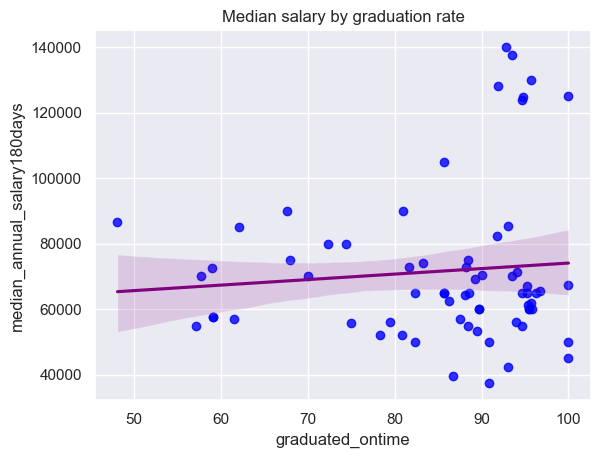

In [50]:
sns.regplot(data = df, x='graduated_ontime',y='median_annual_salary180days', scatter_kws={'color': 'blue'}, line_kws={'color':'purple'})
plt.title('Median salary by graduation rate');

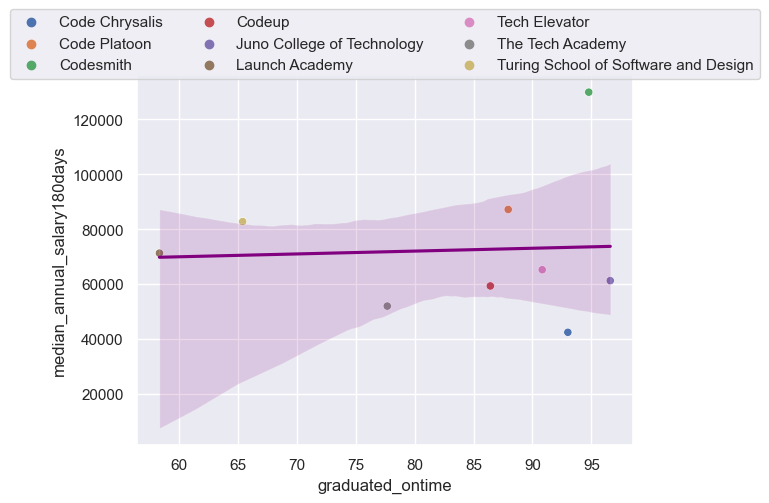

In [58]:
mean_grad_rate = df.groupby('school_name')['graduated_ontime'].mean().reset_index()
avg_medsalary = df.groupby('school_name')['median_annual_salary180days'].mean().reset_index()
merged = pd.merge(mean_grad_rate,avg_medsalary, on='school_name')
sns.scatterplot(data=merged, x='graduated_ontime',y='median_annual_salary180days',hue='school_name', legend='auto')
sns.regplot(data=merged, x='graduated_ontime', y='median_annual_salary180days', scatter=False, color='purple')
legend = plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3);


In [61]:
df.columns

Index(['school_name', 'campus_location', 'program_name', 'program_cost',
       'java', 'csharp_net', 'html', 'css', 'javascript', 'es6', 'jquery',
       'nodejs', 'reactjs', 'redux', 'heroku', 'sql', 'mysql', 'postgress',
       'mongodb', 'firebase', 'git', 'spring', 'api', 'applied_stats',
       'python', 'r', 'regression', 'classification', 'clustering',
       'time_series_analysis', 'anomaly_detection', 'language_processing',
       'machine_learning', 'advanced_topics', 'story_telling_with_data',
       'domain_expertise_development', 'reporting_start', 'reporting_end',
       'course_length', 'graduates_included', 'graduated_ontime',
       'intend_infield_employment', 'employed_infield_90days',
       'employed_infield_180days', 'not_seeking_infield_90days',
       'not_seeking_infield_180days', 'still_seeking_infield_90days',
       'still_seeking_infield_180days', 'median_annual_salary90days',
       'median_annual_salary180days', 'under70K_90days', 'under70K_180days',
   

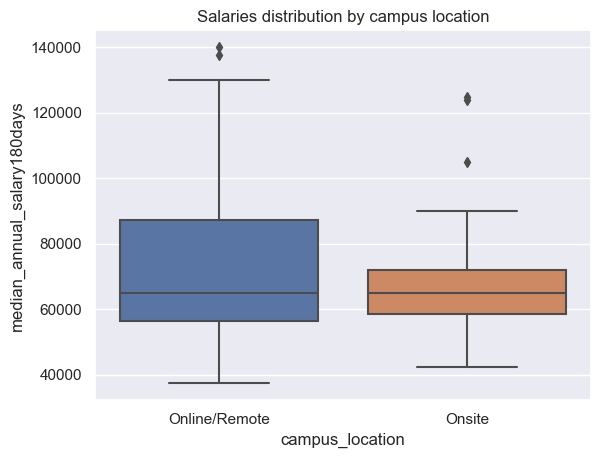

In [62]:
sns.boxplot(x= df['campus_location'].apply(lambda x: "Online/Remote" if x in ['Online','Remote'] else 'Onsite'), y = df['median_annual_salary180days'])
plt.title('Salaries distribution by campus location');

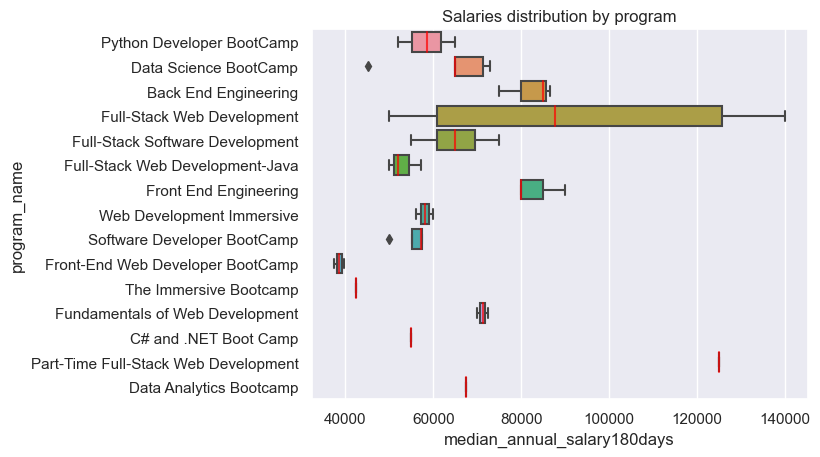

In [63]:
sns.boxplot(x = df['median_annual_salary180days'], y = df['program_name'], medianprops=dict(color="red", alpha=0.7))
plt.title('Salaries distribution by program');

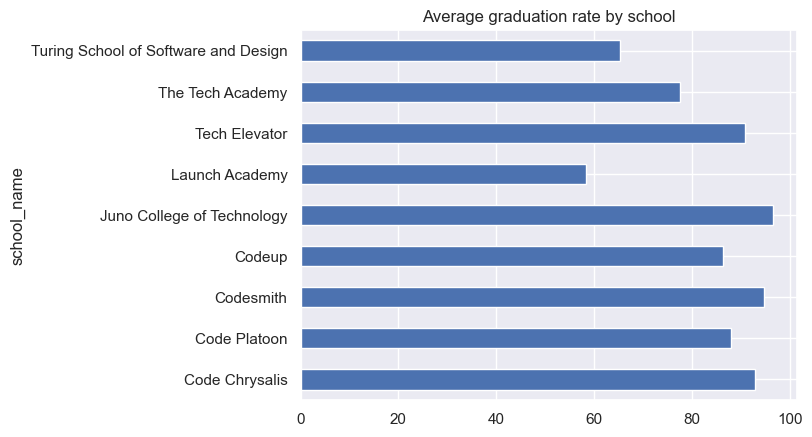

In [64]:

avg_graduation = df.groupby('school_name')['graduated_ontime'].mean()
avg_graduation.plot(kind ='barh')
plt.title('Average graduation rate by school');

In [65]:
# select just the columns containing skills
cols =  ['java', 'csharp_net', 'html', 'css', 'javascript', 'es6', 'jquery',
       'nodejs', 'reactjs', 'redux', 'heroku', 'sql', 'mysql', 'postgress',
       'mongodb', 'firebase', 'git', 'spring', 'api', 'applied_stats',
       'python', 'r', 'regression', 'classification', 'clustering',
       'time_series_analysis', 'anomaly_detection', 'language_processing',
       'machine_learning', 'advanced_topics', 'story_telling_with_data',
       'domain_expertise_development']
# create new dataframe that just contains the skills
skills_df = df[cols]

In [68]:
skills_count = pd.DataFrame(skills_df.apply(lambda x: x.sum()))

# sort skills occurencies in descending order
skills_count.rename(columns= { 0:'skill_freq'},inplace=True)
skills_count = skills_count.sort_values(['skill_freq'],ascending=False)


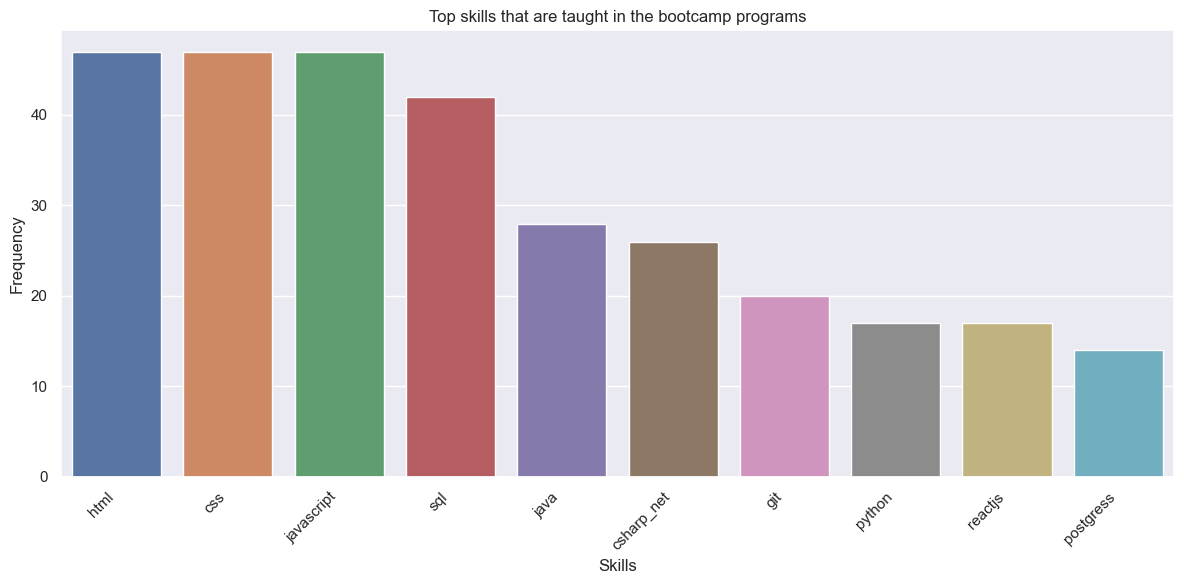

In [69]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=skills_count[:10], x=skills_count[:10].index, y=skills_count[:10]['skill_freq'], ax=ax)
ax.set_title("Top skills that are taught in the bootcamp programs")
ax.set_xlabel("Skills")
ax.set_ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout();


/var/folders/kc/j4ss26096jv9xkwkcr7z36kr0000gn/T/ipykernel_59284/3650425267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Skill Set'] = df_subset.apply(lambda row: [skill for skill in skills_columns if row[skill] == 1], axis=1)
/var/folders/kc/j4ss26096jv9xkwkcr7z36kr0000gn/T/ipykernel_59284/3650425267.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Total Skills'] = df_subset['Skill Set'].apply(len)


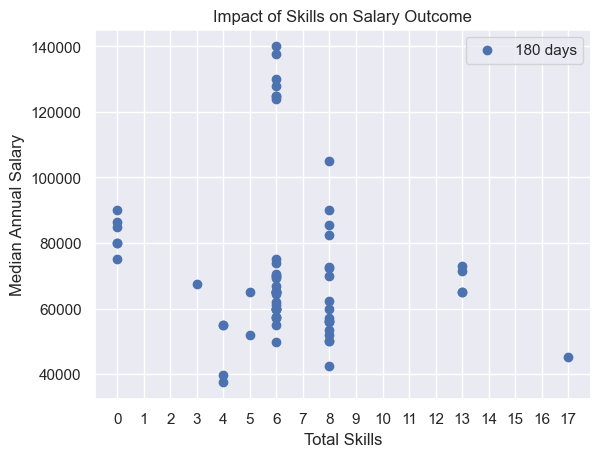

In [73]:
skills_columns = ['java', 'csharp_net', 'html', 'css', 'javascript', 'es6', 'jquery', 'nodejs', 'reactjs', 'redux', 'heroku', 'sql', 'mysql', 'postgress', 'mongodb', 'firebase', 'git', 'spring', 'api', 'applied_stats', 'python', 'r', 'regression', 'classification', 'clustering', 'time_series_analysis', 'anomaly_detection', 'language_processing', 'machine_learning', 'advanced_topics', 'story_telling_with_data', 'domain_expertise_development']
salary_columns = ['median_annual_salary180days']

# Subset the dataframe to include only the relevant columns
df_subset = df[skills_columns + salary_columns]

# Create a new column with a list of present skills for each row
df_subset['Skill Set'] = df_subset.apply(lambda row: [skill for skill in skills_columns if row[skill] == 1], axis=1)

# Calculate the total number of skills present in the program for each row
df_subset['Total Skills'] = df_subset['Skill Set'].apply(len)

# Plot the relationship between total skills and median annual salary
#plt.scatter(df_subset['Total Skills'], df_subset['median_annual_salary90days'], label='90 days')
plt.scatter(df_subset['Total Skills'], df_subset['median_annual_salary180days'], label='180 days')
plt.xlabel('Total Skills')
plt.ylabel('Median Annual Salary')
plt.title('Impact of Skills on Salary Outcome')
plt.legend()
plt.xticks(range(int(df_subset['Total Skills'].max()) + 1))
plt.show()


In [77]:
df2 = df[['program_cost','course_length', 'graduates_included', 'graduated_ontime',
       'intend_infield_employment', 'employed_infield_90days',
       'employed_infield_180days', 'not_seeking_infield_90days',
       'not_seeking_infield_180days', 'still_seeking_infield_90days',
       'still_seeking_infield_180days', 'median_annual_salary90days',
       'median_annual_salary180days', 'under70K_90days', 'under70K_180days',
       'salary_70K_80K_90days', 'salary_70K_80K_180days',
       'salary_80K_90K_90days', 'salary_80K_90K_180days', 'over90K_90days',
       'over90K_180days']]

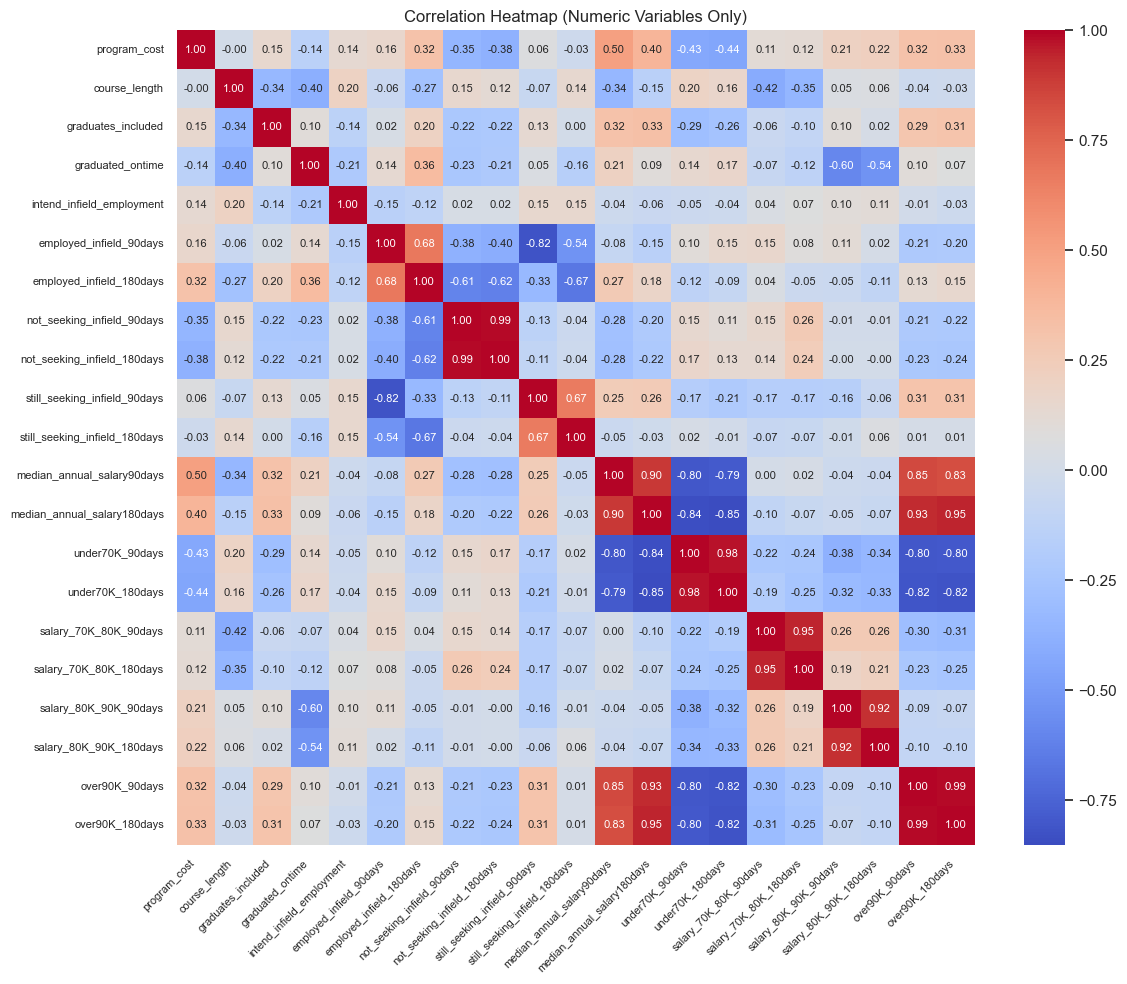

In [80]:

# Create a correlation matrix of the numeric columns
corr_matrix = df2.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap (Numeric Variables Only)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


### Confirmatory Data Analysis

In [82]:
q1 = df['median_annual_salary180days'].quantile(0.25)
q3 = df['median_annual_salary180days'].quantile(0.75)

iqr = q3 - q1
upper = q3 + (iqr * 2)
lower = q3 - (iqr * 2)

df = df[(df['median_annual_salary180days'] > lower) & (df['median_annual_salary180days'] < upper)]

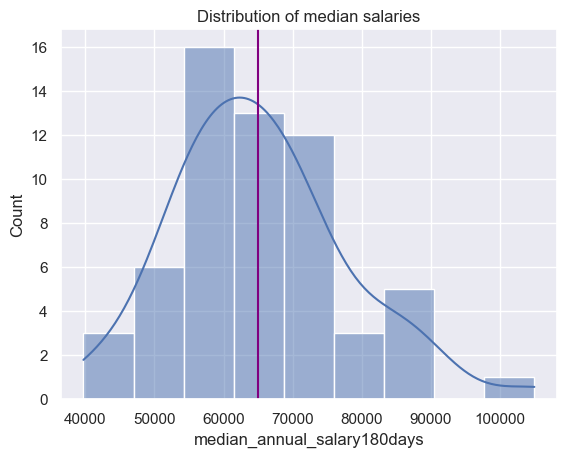

In [84]:
#distribution of median salary 180 days after graduation (data after removing outlier in median salary)
xmedian = np.median(df['median_annual_salary180days'])
sns.histplot(data = df, x = 'median_annual_salary180days',kde=True)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of median salaries");

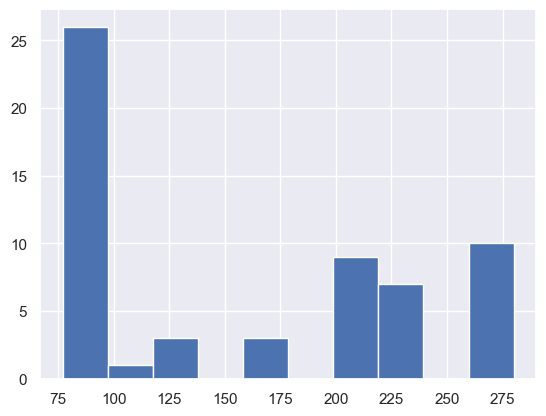

In [87]:
df['course_length'].hist();

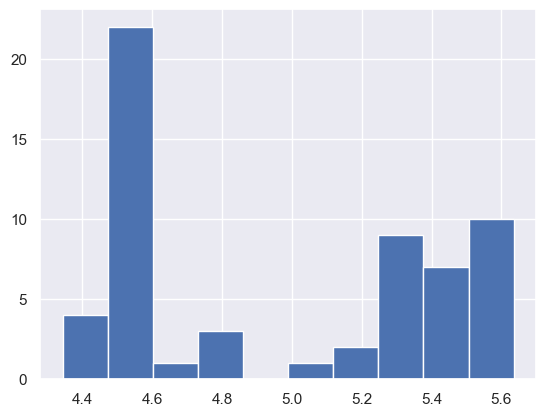

In [88]:
#normalizing 'course_length' column with log normalization, plotting to see if there is a change in distribution
np.log(df['course_length']).hist();

In [90]:
df.to_csv("/Users/anastasiyaayala/Desktop/bootcamps_edu/data/data_normal.csv",index=False)